# 투영

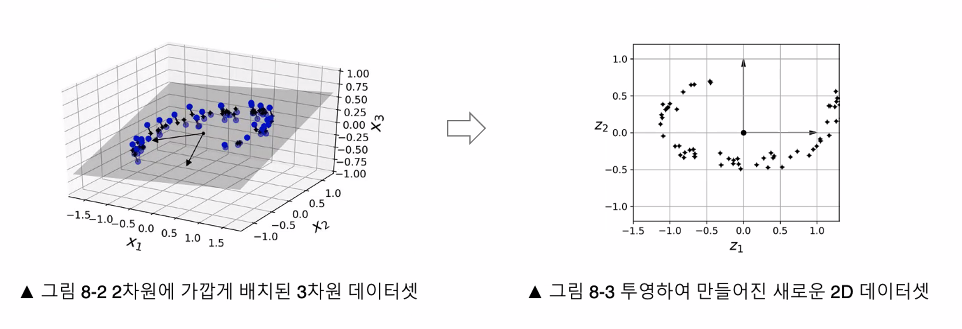

# 매니폴드 학습

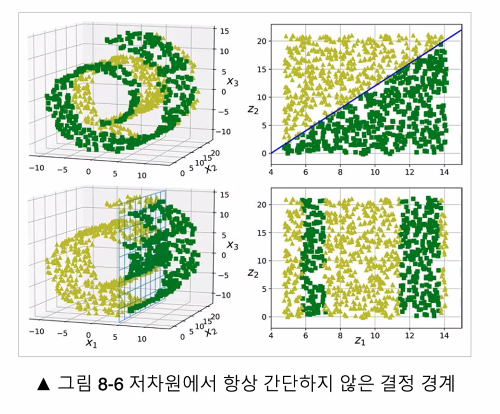

# PCA (Principal component  anaylysis / 주성분 분석)

* 다중공선성

* 먼저 데이터에 가장 가까운 초평면을 정의한 다음, 데이터를 이 평면에 투영
* 분산을 최대화할 수 있는 가상의 축

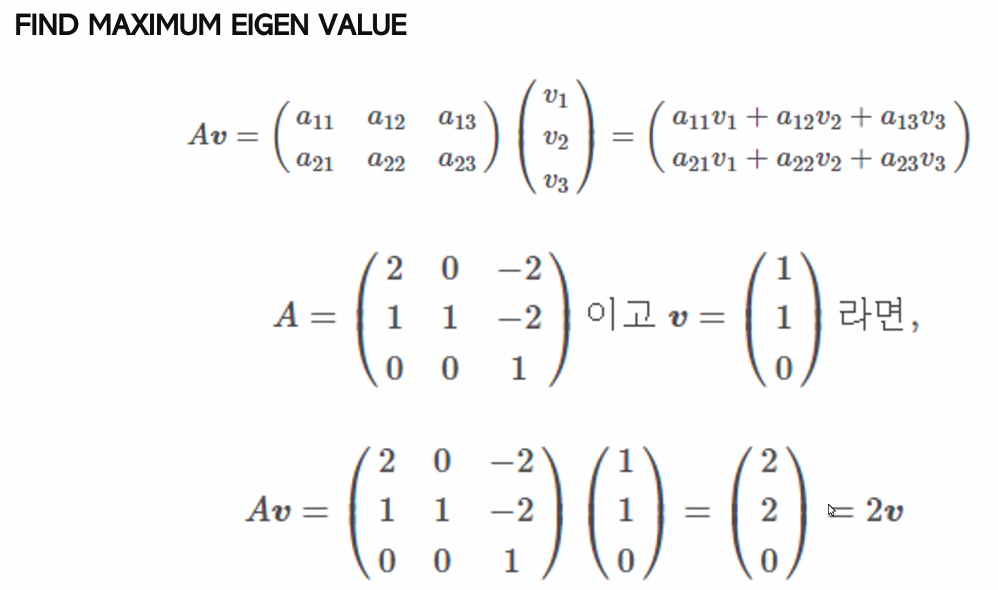

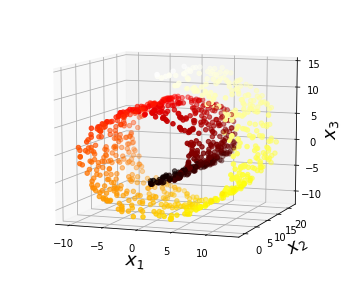

In [174]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)
axes = [-11.5, 14, -2, 23, -12, 15]
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=t, cmap= plt.cm.hot)
ax.view_init(10, -70)
ax.set_xlabel('$x_1$', fontsize=18)
ax.set_ylabel('$x_2$', fontsize=18)
ax.set_zlabel('$x_3$', fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])
plt.savefig('swiss_roll_plot', format="png")
plt.show()

* 타이타닉 데이터로 차원축소 실습

In [180]:
# Simple Preprocessing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mean_squared_error
from sklearn.tree import plot_tree
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
df1 = df.copy()
df1.set_index('PassengerId', inplace=True)
df_test.set_index('PassengerId', inplace=True)
df1.drop(['Name'], axis=1, inplace=True)
df_test.drop(['Name'], axis=1, inplace=True)

df_test.Cabin.astype(str)

# 결측치 처리
df1.Cabin.fillna('N', inplace=True)
df1.Embarked.fillna('S', inplace=True)
df1.Age.fillna(df1.Age.median(), inplace=True)
df_test.Cabin.fillna('N', inplace=True)
df_test.Fare.fillna(df1.Fare.median(), inplace=True)
df_test.Age.fillna(df1.Age.median(), inplace=True)

df1.Cabin = df1.Cabin.apply(lambda x:x[0])
df_test.Cabin = df_test.Cabin.apply(lambda x:x[0])

# 인코딩
og_columns = df1.columns[(df1.dtypes=='O')|(df1.dtypes=='category')|(df1.dtypes=='bool')]
og_columns

for i in og_columns:
    globals()[f'df1_{i}_encoder'] = LabelEncoder()
    globals()[f'df1_{i}_encoder'].fit(df1[i])
    globals()[f'df_kg_{i}_encoder'] = LabelEncoder()
    globals()[f'df_kg_{i}_encoder'].fit(df_test[i])
    df1[i] = globals()[f'df1_{i}_encoder'].transform(df1[i])
    df_test[i] = globals()[f'df_kg_{i}_encoder'].transform(df_test[i])

# X, y 분리
X = df1.drop('Survived', axis=1)
y = df1.Survived

# train, test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [160]:
from sklearn.decomposition import PCA

#타이타닉 X 데이터를 2차원으로 축소

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)
result = pd.DataFrame(X2D)
result.index = list(range(1,892))
result.columns = ['z1', 'z2',]
result['y'] = y

In [96]:
result

,z1,z2,z3,y
1,184.596669,-24.454799,-5.863746,0
2,257.270726,40.384041,8.863681,1
3,330.572098,-23.110847,-1.199904,1
4,-289.636908,20.013651,3.858254,1
5,133.534763,-23.505843,6.884282,0
...,...,...,...,...
887,-237.439998,-20.197270,-2.928312,0
888,-324.480993,-3.618408,-11.592846,1
889,336.506392,-7.508735,0.350910,0
890,-330.510207,-3.469487,-4.656127,1


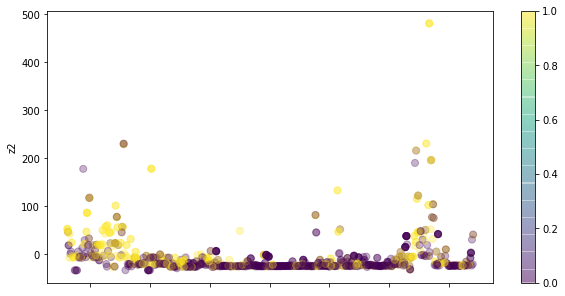

In [102]:
result.plot(kind='scatter', x='z1',  y='z2', figsize=(10, 5),
            cmap='viridis', c=y, s=50, alpha=0.3)

In [103]:
#설명된 분산의 비율
#적절한 차원 수 선택하기
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_

array([9.35419455e-01, 6.06557264e-02, 3.79510642e-03, 6.52564787e-05,
       2.94065717e-05, 1.35283576e-05, 1.12313616e-05, 5.70958740e-06,
       4.57945152e-06])

In [104]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum  #설명력

array([0.93541946, 0.99607518, 0.99987029, 0.99993554, 0.99996495,
       0.99997848, 0.99998971, 0.99999542, 1.        ])

In [112]:
d = np.argmax(cumsum >= 0.95) + 1
n_components=d
pca = PCA(n_components=d)
XTD = pca.fit_transform(X_train)
XTD

array([[ 208.99144511,  -11.89896123],
       [  87.90887396,  -24.14608669],
       [-150.1037868 ,  -18.08474068],
       ...,
       [-101.04375404,  -21.89154091],
       [-152.06817986,  -17.82198483],
       [  56.85174023,  -16.63373846]])

* Decision Tree 돌려보기

In [169]:
X = result.drop('y', axis=1)
y = result.y

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=19)

In [171]:
rf_clf = RandomForestClassifier(n_estimators=1000, max_depth=5)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, rf_pred)

0.7222222222222222

In [172]:
dt_clf = DecisionTreeClassifier(max_depth=3)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, dt_pred)

0.6666666666666666

In [168]:
# kaggle test 데이터로 submission 만들기
pca = PCA(n_components=4)
X2D_test = pca.fit_transform(df_test)
result_test = pd.DataFrame(X2D_test)
#result_test.index = list(range(1,419))
result_test.columns = ['z1', 'z2']
result_test

,z1,z2,z3,z4
0,28.612222,-27.759497,6.429493,-0.779337
1,-40.185265,-26.522271,19.954667,-1.147623
2,108.060114,-24.956977,32.507005,-1.940931
3,33.502733,-27.603666,-1.184459,-0.641613
4,42.471314,-24.518463,-6.611121,-0.627777
...,...,...,...,...
413,-86.461438,-26.265073,1.647829,-0.279906
414,-141.809139,76.120825,5.586669,2.949704
415,-165.286800,-25.001452,13.345004,-0.419212
416,-39.472659,-26.997448,0.947758,-0.432087


In [167]:
predict = rf_clf.predict(result_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)

In [119]:
#실제로는 분산의 비율로 설정하는 것이 좋음
pca = PCA(n_components=3)
X2D = pca.fit_transform(X_train)

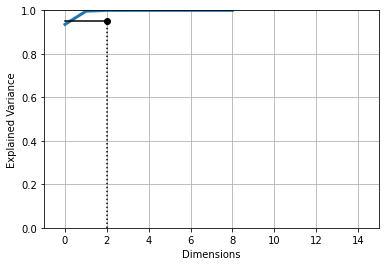

In [107]:
#cumsum 시각화
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 100, 0, 1])
plt.xlabel('Dimensions')
plt.ylabel('Explained Variance')
plt.plot([d, d], [0, 0.95], 'k:')
plt.plot([0, d], [0.95, 0.95], 'k')
plt.plot(d, 0.95, 'ko')
plt.xlim(-1,15)
#plt.annotate(“Elbow”, xy=(65, 0.85), xytext=(70, 0.7),
#             arrowprops=dict(arrowstyle=“->“), fontsize=16)
plt.grid(True)
#save_fig(“explained_variance_plot”)
plt.show()

# 압축을 위한 PCA

* 복원시 약간의 재구성 오차(reconstruction error)발생
* 그러나 원본과 거의 유사

In [125]:
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
X_recovered

array([[ 209.64652133,  -11.62808251,   -0.46481501],
       [  88.55610367,  -23.79789701,   -0.46466641],
       [-149.45275017,  -17.58266417,   -0.433085  ],
       ...,
       [-100.39503269,  -21.42090253,   -0.44224955],
       [-151.41698036,  -17.31844163,   -0.43260328],
       [  57.50390581,  -16.26570826,   -0.45356746]])

# 랜덤 PCA

* svd_solver 매개변수를 'randomized'로 지정하면 랜덤 PCA
* 확률적 알고리즘 사용으로 주성분에 대한 근사값을 빠르게 검색
* 기본값 auto : 자동으로 계산하여 랜덤으로 돌릴지 완전한 계산을 할 지 결정 ( <-> full)

# 점진적 PCA

* 대용량 데이터 메모리에 올리는 문제 해결
* 훈련 데이터를 미니 배치로 나눠 한번에 하나씩 주입
* 대용량 데이터 혹은 오라인으로 PCA 적용시 유지

In [173]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
  inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train)

ValueError: ignored

# 그 외 방법들

• 랜덤 투영(random projection)
• 랜덤한 선형 투영을 사용해 데이터를 저차원 공간으로 투영
•다차원 스케일링(MDS, multidimensional scaling)
•샘플 간의 거리를 보존하면서 차원을 축소
•Isomap
•각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만들고, 샘플 간의 지오데식 거리(geodesic distance)를 유지하면서 차원을 축소
•t-SNE(t-distributed stochastic neighbor embedding)
•비슷한 샘플은 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소
•선형 판별 분석(LDA, linear discriminant analysis)
•분류 알고리즘이지만 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습. 이 축은 데이터가 투영되는 초평면을 정의하는 데 사용

# LDA(linear discriminant analysis/선형판별분석)

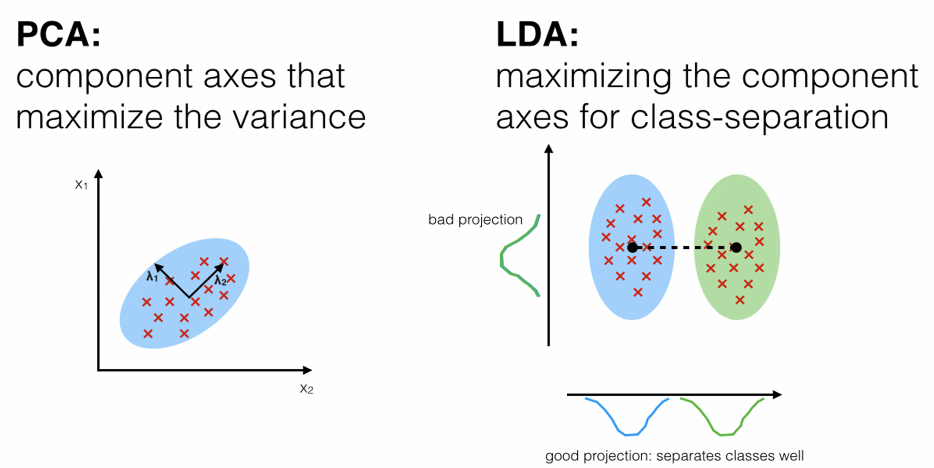

In [181]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train).transform(X_test)

array([[-1.08382103],
       [-0.76484624],
       [-0.84536417],
       [-1.06821555],
       [-0.34423431],
       [-1.39520093],
       [ 2.81254232],
       [-0.16861106],
       [-1.48713973],
       [-1.80376064],
       [ 1.30401069],
       [-0.92208679],
       [-0.39019295],
       [ 1.40383249],
       [-0.20386197],
       [-0.80863015],
       [-1.8156366 ],
       [-0.96848137],
       [-0.88710604],
       [-0.42055662],
       [ 1.61335525],
       [-0.71902327],
       [-0.99822276],
       [ 0.14862274],
       [-1.59993502],
       [ 0.8584721 ],
       [ 0.67478149],
       [-1.33625266],
       [ 0.87914036],
       [-1.37642053],
       [-0.92935498],
       [-1.657495  ],
       [ 2.11278034],
       [-1.17394059],
       [ 0.86380662],
       [ 1.80105287],
       [-0.20432714],
       [-0.70086431],
       [-0.40935989],
       [ 1.21948747],
       [-0.03553753],
       [ 0.42484183],
       [ 0.81640481],
       [-0.94737942],
       [ 2.51583573],
       [ 1

In [182]:
lda.fit(X_train, y_train).score(X_test, y_test)

0.8555555555555555

In [183]:
predict = lda.predict(df_test)
tit = pd.read_csv('/content/drive/MyDrive/ Encore Prac/titanic_test.csv')
submission = pd.DataFrame({
        "PassengerId": tit["PassengerId"],
        "Survived": predict
    })
submission.to_csv('submission.csv', index=False)